<a href="https://colab.research.google.com/github/vgorbikov/mldlvsu_labs/blob/main/Lab_1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
«Изучение особенностей устройства и функционирования простейшего
персептрона в контексте задачи классификации»

**Цель работы** — освоение ключевых принципов обучения с учителем, с
акцентом на решение задачи бинарной классификации. В ходе выполнения
работы исследуются особенности устройства и принципы функционирования
математической модели искусственного нейрона на примере решения
логических операций OR, AND и XOR.

## ЗАДАНИЕ
1. Осуществить обучение нейрона выполнению функции логического
«ИЛИ».
2. Осуществить попытку обучения одного нейрона выполнению функции
«Исключающего ИЛИ» (XOR) и посмотреть на результат.
3. Построить и обучить модель для решения функции «Исключающего
ИЛИ» (XOR).
4. Построить график активационной функции заданного вида (по
вариантам, по номеру в списке).

### Вариант 9
Активацтонная функция **Softmax** (область значений (0, 1)):
$$
f(x) = \frac{e^{x_i}}{\sum^J_{j=1} e^{x_j}}, i=1...J
$$
Где $J$ - размер входного вектора

## Решение

### Подготовка

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Вспомогательная функция для отрисовки границы решения
def plot_decision_boundary(model, X, y):
    X = X.numpy()
    y = y.numpy()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x_min, x_max, 500),
                           np.linspace(y_min, y_max, 500))
    x_in = np.c_[xx1.ravel(), xx2.ravel()]

    # Преобразуем данные для предсказания
    x_in_tensor = torch.tensor(x_in, dtype=torch.float32)
    with torch.no_grad():
        y_pred = model(x_in_tensor).numpy()

    y_pred = np.round(y_pred).reshape(xx1.shape)

    plt.contourf(xx1, xx2, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.pause(0.01)

In [10]:
# функция для обучения моделей
def train(model: nn.Module, x: torch.tensor, y: torch.tensor, epoch: int = 1000, lr: float = 1e-2, visualize: bool = True):
  model.train() # переключаем модель в режим обучения
  loss_f = nn.BCELoss() # задаём функцию ошибки
  optimizer = torch.optim.Adam(model.parameters(), lr=lr) # задаём оптимизатор

  for epoch_no in range(epoch):
    outputs = model(x)
    loss = loss_f(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch: {epoch_no}/{epoch}; Loss: {loss.item()}')

    # для отчёта вывод промежуточных графиков разделения отключён, чтобы не перегружать вывод
    # if epoch_no%10 == 0 and visualize:
    #   plot_decision_boundary(model, x, y)

    if torch.round(outputs).eq(y).all():
        print('Training completed :)')
        plot_decision_boundary(model, x, y)
        break

  return model

In [11]:
# функция для тестирования
def test(model: nn.Module, x, y):
  model.eval()
  l = len(x)
  outs = model(x).round()

  good_answers = sum([1 for i in range(l) if outs[i] == y[i]])

  for i in range(l):
    print(f'{[int(n) for n in x[i]]} -> {int(outs[i])}')

  print(f'Test result: {good_answers}/{l}')

In [12]:
# Входные данные
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) # входные данные x1 и x2 (признаки, характеризующие объект)
Y_OR = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # желаемый выход для ИЛИ
Y_XOR = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # желаемый выход для исключающего ИЛИ

### 1. Учим один нейрон логическому ИЛИ

In [13]:
# Модель с одним нейроном
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
      z = self.fc(x)
      p = torch.sigmoid(z) # тут softmax использовать бессмысленно
      return p

Epoch: 0/1000; Loss: 0.7591744065284729
Epoch: 1/1000; Loss: 0.7514414191246033
Epoch: 2/1000; Loss: 0.7438222169876099
Epoch: 3/1000; Loss: 0.7363185286521912
Epoch: 4/1000; Loss: 0.7289323806762695
Epoch: 5/1000; Loss: 0.7216655015945435
Epoch: 6/1000; Loss: 0.7145196199417114
Epoch: 7/1000; Loss: 0.707496166229248
Epoch: 8/1000; Loss: 0.7005964517593384
Epoch: 9/1000; Loss: 0.6938216686248779
Epoch: 10/1000; Loss: 0.6871727705001831
Epoch: 11/1000; Loss: 0.6806506514549255
Epoch: 12/1000; Loss: 0.6742557883262634
Epoch: 13/1000; Loss: 0.6679889559745789
Epoch: 14/1000; Loss: 0.6618502736091614
Epoch: 15/1000; Loss: 0.655839741230011
Epoch: 16/1000; Loss: 0.649957537651062
Epoch: 17/1000; Loss: 0.6442033648490906
Epoch: 18/1000; Loss: 0.6385767459869385
Epoch: 19/1000; Loss: 0.6330772638320923
Epoch: 20/1000; Loss: 0.6277040243148804
Epoch: 21/1000; Loss: 0.6224562525749207
Epoch: 22/1000; Loss: 0.617332935333252
Epoch: 23/1000; Loss: 0.612332820892334
Epoch: 24/1000; Loss: 0.6074545

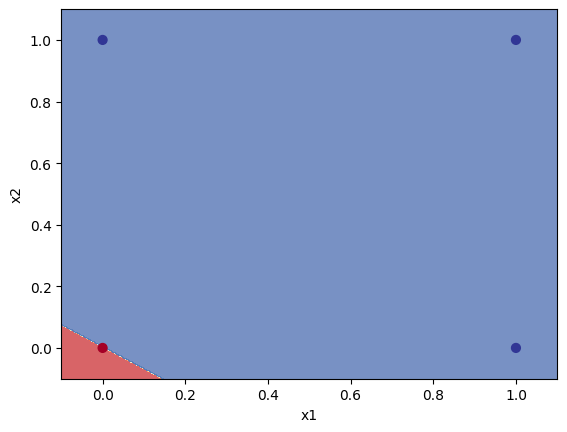

In [14]:
so_so_model = Perceptron(input_size=2)
so_so_model = train(so_so_model, X, Y_OR)

In [15]:
test(so_so_model, X, Y_OR)

[0, 0] -> 0
[0, 1] -> 1
[1, 0] -> 1
[1, 1] -> 1
Test result: 4/4


### 2. Учим один нейрон исключающему ИЛИ (попытка обречена на провал)

In [16]:
so_so_model2 = Perceptron(input_size=2)
so_so_model2 = train(so_so_model2, X, Y_XOR)

Epoch: 0/1000; Loss: 0.7733922004699707
Epoch: 1/1000; Loss: 0.7694365382194519
Epoch: 2/1000; Loss: 0.7655744552612305
Epoch: 3/1000; Loss: 0.7618083953857422
Epoch: 4/1000; Loss: 0.7581408023834229
Epoch: 5/1000; Loss: 0.7545740604400635
Epoch: 6/1000; Loss: 0.751110315322876
Epoch: 7/1000; Loss: 0.7477514743804932
Epoch: 8/1000; Loss: 0.7444994449615479
Epoch: 9/1000; Loss: 0.7413558959960938
Epoch: 10/1000; Loss: 0.7383220791816711
Epoch: 11/1000; Loss: 0.7353994250297546
Epoch: 12/1000; Loss: 0.7325888872146606
Epoch: 13/1000; Loss: 0.7298911809921265
Epoch: 14/1000; Loss: 0.7273067235946655
Epoch: 15/1000; Loss: 0.724835991859436
Epoch: 16/1000; Loss: 0.7224786281585693
Epoch: 17/1000; Loss: 0.7202344536781311
Epoch: 18/1000; Loss: 0.7181029319763184
Epoch: 19/1000; Loss: 0.7160831093788147
Epoch: 20/1000; Loss: 0.7141736149787903
Epoch: 21/1000; Loss: 0.7123733162879944
Epoch: 22/1000; Loss: 0.7106801867485046
Epoch: 23/1000; Loss: 0.7090921998023987
Epoch: 24/1000; Loss: 0.7076

In [17]:
test(so_so_model2, X, Y_XOR)

[0, 0] -> 0
[0, 1] -> 0
[1, 0] -> 0
[1, 1] -> 0
Test result: 2/4


Эта идея **не увенчалась успехом**

### 3. Создаём модель поумнее, пробуем научить исключающему ИЛИ

In [18]:
class StrongPerceptron(nn.Module):
    def __init__(self, input_size):
        super(StrongPerceptron, self).__init__()
        self.l1 = nn.Linear(input_size, 2) # тут у нас уже два слоя и три нейрона
        self.l2 = nn.Linear(input_size, 1)

    def forward(self, x):
      z1 = self.l1(x)
      p1 = torch.sigmoid(z1)
      z2 = self.l2(p1)
      p2 = torch.sigmoid(z2)
      return p2

Epoch: 0/5000; Loss: 0.7476452589035034
Epoch: 1/5000; Loss: 0.7441979646682739
Epoch: 2/5000; Loss: 0.7408568859100342
Epoch: 3/5000; Loss: 0.737622857093811
Epoch: 4/5000; Loss: 0.7344929575920105
Epoch: 5/5000; Loss: 0.7314634919166565
Epoch: 6/5000; Loss: 0.7285344004631042
Epoch: 7/5000; Loss: 0.7257083654403687
Epoch: 8/5000; Loss: 0.7229890823364258
Epoch: 9/5000; Loss: 0.7203803062438965
Epoch: 10/5000; Loss: 0.7178859114646912
Epoch: 11/5000; Loss: 0.7155096530914307
Epoch: 12/5000; Loss: 0.7132551670074463
Epoch: 13/5000; Loss: 0.7111254930496216
Epoch: 14/5000; Loss: 0.7091234922409058
Epoch: 15/5000; Loss: 0.7072515487670898
Epoch: 16/5000; Loss: 0.7055111527442932
Epoch: 17/5000; Loss: 0.7039036750793457
Epoch: 18/5000; Loss: 0.7024291157722473
Epoch: 19/5000; Loss: 0.7010868787765503
Epoch: 20/5000; Loss: 0.6998752355575562
Epoch: 21/5000; Loss: 0.6987912654876709
Epoch: 22/5000; Loss: 0.697830855846405
Epoch: 23/5000; Loss: 0.6969889402389526
Epoch: 24/5000; Loss: 0.6962

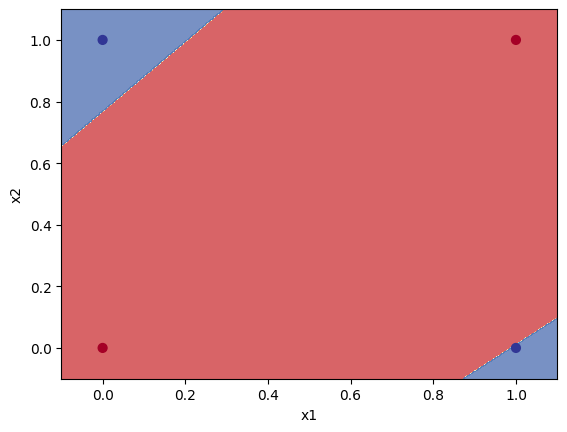

In [20]:
strong = StrongPerceptron(input_size=2)
strong = train(strong, X, Y_XOR, 5000, 0.01, True)

In [21]:
test(strong, X, Y_XOR)

[0, 0] -> 0
[0, 1] -> 1
[1, 0] -> 1
[1, 1] -> 0
Test result: 4/4


### 4. Построим график функции Softmax

In [22]:
def softmax(x: list):
  return np.exp(x)/np.sum(np.exp(x))

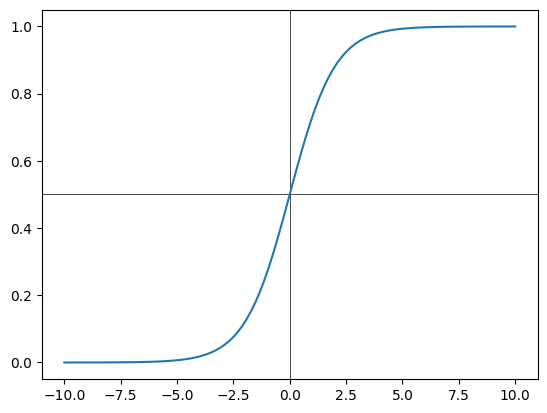

In [23]:
# хитрость в том что softmax - многомерная функция, строить график для менее чем двух аргументов бессмысленно
# чтобы получить график "как из учебника", необходимо зафиксировать значения всех аргументов (мы возьмём 2), кроме одного
xs = np.linspace(-10, 10, 100)
xs2 = np.zeros((100,))

ys = [softmax([xs[i], xs2[i]])[0] for i in range(100)]

plt.axhline(0.5, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.plot(xs, ys)
plt.show()

## Выводы
Простейший персептрон хоть и лежит в основе практических всех моделей машинного обучения, сам по себе способен решать задачи лишь весьма ограниченного спектра.
Для решения сложных задач необходимы сети, состоящие из множества слоёв. При этом, для их успешной работы, необходимо использовать нелинейные функции активации.